In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris=pd.read_csv('C:/Users/ADMIN/Documents/Datasets Kaggle/IRIS.csv')
iris.head(), iris.shape

(   sepal_length  sepal_width  petal_length  petal_width      species
 0           5.1          3.5           1.4          0.2  Iris-setosa
 1           4.9          3.0           1.4          0.2  Iris-setosa
 2           4.7          3.2           1.3          0.2  Iris-setosa
 3           4.6          3.1           1.5          0.2  Iris-setosa
 4           5.0          3.6           1.4          0.2  Iris-setosa,
 (150, 5))

In [3]:
x=iris.iloc[0:,:4]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y=iris.species
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [7]:
para={'n_neighbors':np.arange(1,31)}

In [8]:
grid_search=GridSearchCV(knn,para,cv=10,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [9]:
grid_search.best_params_

{'n_neighbors': 11}

In [10]:
y_pred=grid_search.predict(x_train)
y_pred.flatten()

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'I

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
report=classification_report(y_train,y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       0.94      0.92      0.93        37
 Iris-virginica       0.92      0.95      0.93        37

       accuracy                           0.95       105
      macro avg       0.96      0.95      0.95       105
   weighted avg       0.95      0.95      0.95       105



In [12]:
max=confusion_matrix(y_train,y_pred)
max

array([[31,  0,  0],
       [ 0, 34,  3],
       [ 0,  2, 35]], dtype=int64)

In [13]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

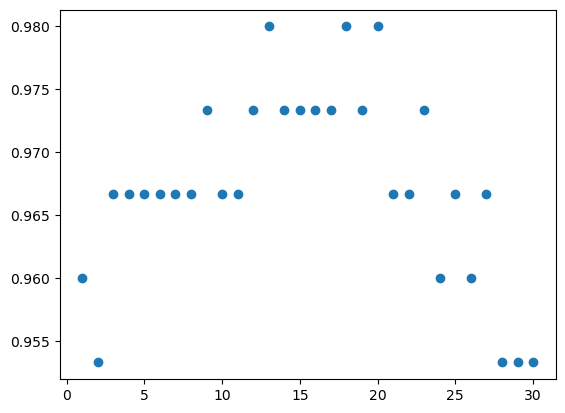

In [14]:
plt.scatter(k_range,k_scores)
plt.show()

In [15]:
input=[5,3.3,1.1,0.2]
result=grid_search.predict([input])
result

E:\Python Libs\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)